# Training an image classifier 

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Define transformations and other parameters
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Adjust size if needed
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

# Use FashionMNIST dataset from torchvision
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Classes for FashionMNIST dataset
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


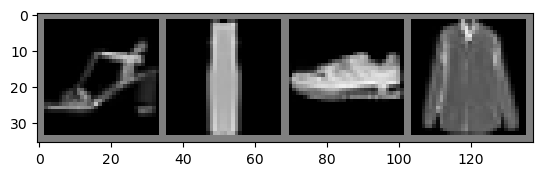

Sandal       Dress        Sneaker      Shirt       


In [8]:

# Display sample images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:12s}' for j in range(batch_size)))



In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Change the input channels of the first convolutional layer to 3
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Initialize the network, loss function, and optimizer
net = Net()


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# Train The network

In [11]:
# Training the network
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 1.198
[1,  4000] loss: 0.665
[1,  6000] loss: 0.566
[1,  8000] loss: 0.524
[1, 10000] loss: 0.486
[1, 12000] loss: 0.486
[1, 14000] loss: 0.419
[2,  2000] loss: 0.421
[2,  4000] loss: 0.410
[2,  6000] loss: 0.381
[2,  8000] loss: 0.387
[2, 10000] loss: 0.368
[2, 12000] loss: 0.364
[2, 14000] loss: 0.348
Finished Training


In [12]:

# Save the trained model
PATH = './fashion_net.pth'
torch.save(net.state_dict(), PATH)


# Test the network on the test data

In [13]:

# Test the network on the test data
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')


Accuracy of the network on the test images: 86.01%


In [14]:

# Class-wise accuracy
class_correct = list(0. for _ in range(10))
class_total = list(0. for _ in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print(f'Accuracy for class {classes[i]}: {100 * class_correct[i] / class_total[i]:.2f}%')


Accuracy for class T-shirt/top: 73.70%
Accuracy for class Trouser: 96.00%
Accuracy for class Pullover: 76.90%
Accuracy for class Dress: 87.40%
Accuracy for class Coat: 78.60%
Accuracy for class Sandal: 96.50%
Accuracy for class Shirt: 65.80%
Accuracy for class Sneaker: 94.40%
Accuracy for class Bag: 96.90%
Accuracy for class Ankle boot: 93.90%
